## This is Lab that work with London prices
**I want to lern how to use makrdown**<br>
*italic text*
- One
- Two
   - Three
   - Four
```python
print("Hello")
> This is a blockquote

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

In [2]:
# Construct the file path to the parent directory
file_path = os.path.join('kaggle_london_house_price_data.csv')

# Load the data
df = pd.read_csv(file_path)

# Drop rows with missing values
df = df.dropna(subset=["floorAreaSqM", "saleEstimate_currentPrice"])

In [3]:
# Print number of rows
print("Number of rows: ", len(df))
# Print average estimated price
print("Average estimated price: ", df["saleEstimate_currentPrice"].mean())

Number of rows:  266633
Average estimated price:  879453.9873158986


In [30]:
# Filter out rows where the postcode has fewer than 2 occurrences
postcode_counts = df["postcode"].value_counts()
valid_postcodes = postcode_counts[postcode_counts >= 2].index
filtered_df = df[df["postcode"].isin(valid_postcodes)]

# Split the data into training, cross-validation and test sets
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])




splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(filtered_df, filtered_df["postcode"]):
    strat_train_set_n = filtered_df.iloc[train_index]
    strat_test_set_n = filtered_df.iloc[test_index]

strat_splits.append([strat_train_set_n, strat_test_set_n])

/opt/conda/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [37]:
print ("Number of rows in test set:",len(test))
print ("Number of rows in train set:",len(train))
print ("Number of rows in validate set:",len(validate))

Number of rows in test set: 53327
Number of rows in train set: 159979
Number of rows in validate set: 53327


In [6]:
# Function for shuffle and split data
def shuffle_and_split_data(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [7]:
# Split data on train and test with determinated random
train_set, test_set = shuffle_and_split_data(df, 0.2)
print("Number of rows in training set: ", len(train_set))

Number of rows in training set:  213307


In [8]:
# Plot diviation prices
dl = [0] * 22
for y in train_set[["saleEstimate_currentPrice"]].values:
    # count values less then 150000
    if y < 60000:
        dl[0] = dl[0] + 1
    elif y >= 60000 and y < 100000:
        dl[1] = dl[1] + 1
    elif y >= 100000 and y < 140000:
        dl[2] = dl[2] + 1
    elif y >= 140000 and y < 180000:
        dl[3] = dl[3] + 1
    elif y >= 180000 and y < 220000:
        dl[4] = dl[4] + 1
    elif y >= 220000 and y < 260000:
        dl[5] = dl[5] + 1
    elif y >= 260000 and y < 300000:
        dl[6] = dl[6] + 1
    elif y >= 300000 and y < 340000:
        dl[7] = dl[7] + 1
    elif y >= 340000 and y < 380000:
        dl[8] = dl[8] + 1
    elif y >= 380000 and y < 420000:
        dl[9] = dl[9] + 1
    elif y >= 420000 and y < 460000:
        dl[10] = dl[10] + 1
    elif y >= 460000 and y < 500000:
        dl[11] = dl[11] + 1
    elif y >= 500000 and y < 540000:
        dl[12] = dl[12] + 1
    elif y >= 540000 and y < 580000:
        dl[13] = dl[13] + 1
    elif y >= 580000 and y < 620000:
        dl[14] = dl[14] + 1
    elif y >= 620000 and y < 660000:
        dl[15] = dl[15] + 1
    elif y >= 660000 and y < 700000:
        dl[16] = dl[16] + 1
    elif y >= 700000 and y < 740000:
        dl[17] = dl[17] + 1
    elif y >= 740000 and y < 780000:
        dl[18] = dl[18] + 1
    elif y >= 780000 and y < 820000:
        dl[19] = dl[19] + 1
    elif y >= 820000 and y < 860000:
        dl[20] = dl[20] + 1
    elif y >= 860000 and y < 900000:
        dl[21] = dl[21] + 1
  
print(dl)

[0, 2, 51, 377, 1241, 2973, 6253, 9049, 11056, 13676, 14474, 14220, 12645, 11394, 9877, 9074, 7981, 6783, 6321, 5711, 5489, 4478]


0.0
2.813210290758482e-07
7.173686241434128e-06
5.302901398079738e-05
0.0001745596985415638
0.0004181837097212483
0.0008795501974056394
0.0012728369960536751
0.0015551426487312888
0.00192367319682065
0.002035920287421913
0.00200019251672928
0.0017786522063320503
0.0016026859026451068
0.0013893039020910763
0.0012763535089171233
0.001122611566527172
0.0009541002701107393
0.0008891151123942182
0.0008033121985260845
0.0007720855642986653
0.0006298777841008241


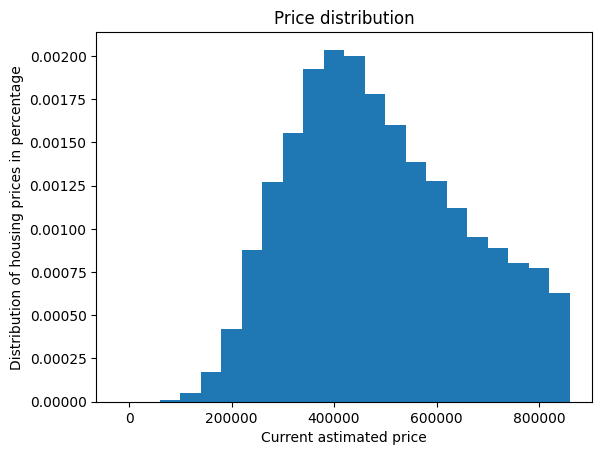

In [10]:
# Plot histogram set
dlcc = dl
for i in range(0, 22):
    dlcc[i] = ( dlcc[i] / len(df) ) * 100
    print(dlcc[i])
plt.bar(range(0, 880000, 40000), dlcc, width=40000)
plt.xlabel("Current astimated price")
plt.ylabel("Distribution of housing prices in percentage")
plt.title("Price distribution")
plt.show()


In [42]:
# Ptint minimal and maximal current price
print(validate["saleEstimate_currentPrice"].min())
print(validate["saleEstimate_currentPrice"].max())

117000.0
23521000.0


In [43]:
### Add a column for the log of the sale estimate
##X = train_set[["floorAreaSqM"]].values
##y = train_set[["saleEstimate_currentPrice"]].values
X = train[["floorAreaSqM"]].values
y = train[["saleEstimate_currentPrice"]].values
# Create Isotonic regression model
ir = IsotonicRegression(out_of_bounds="clip")
# Make new X from floorAreaSqM for Isotonic regression
X_ = np.array([x[0] for x in X])
# Make new y from saleEstimate_currentPrice for Isotonic regression
y_ = np.array([y[0] for y in y])

# Ensure X_ and y_ are sorted as IsotonicRegression requires sorted data
sorted_indices = np.argsort(X_)
X_ = X_[sorted_indices]
y_ = y_[sorted_indices]

# Fit the model
ir.fit(X_, y_)
# Transform the data
y_ = ir.transform(X_)

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

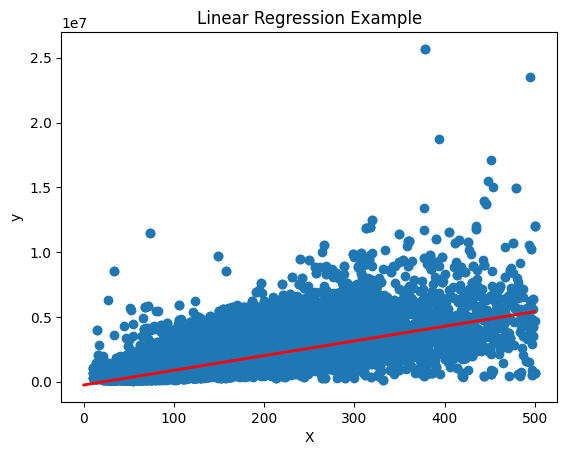

In [44]:
# Make predictions
X_new = np.array([[0], [500]])
y_predict = model.predict(X_new)

# Plot the results
plt.scatter(X, y)
plt.plot(X_new, y_predict, color='red', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Example")
plt.show()

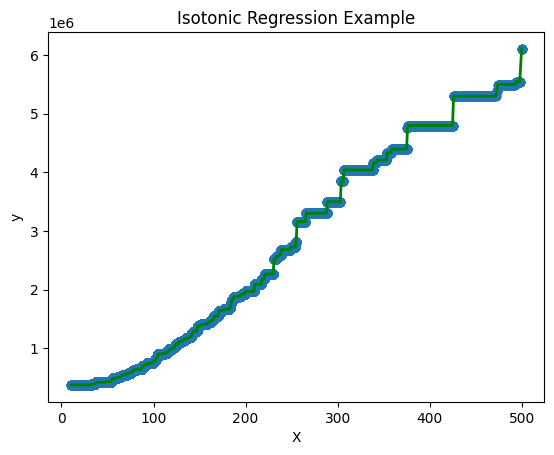

In [45]:
# Make predictions with Isotonic regression
y_predict_isotonic = ir.predict(X_)
# Plot the results
plt.scatter(X_, y_)
plt.plot(X_, y_predict_isotonic, color='green', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Isotonic Regression Example")
plt.show()

In [27]:
# Print the coefficients
print("Linear Regression Coefficients: ", model.coef_)
print("Isotonic Regression Coefficients: ", ir.predict(X_))
# Print the intercept
print("Linear Regression Intercept: ", model.intercept_)
# Print the score
print("Linear Regression Score: ", model.score(X, y))
# Print the score for Isotonic regression
print("Isotonic Regression Score: ", ir.score(X_, y_))

Linear Regression Coefficients:  [[11336.80312254]]
Isotonic Regression Coefficients:  [ 372845.14925373  372845.14925373  372845.14925373 ... 5722450.98039216
 5722450.98039216 5722450.98039216]
Linear Regression Intercept:  [-249152.22542331]
Linear Regression Score:  0.5628666340824264
Isotonic Regression Score:  1.0


In [55]:
### Evaluate Linear model on the test set using R^2 score
##X_test = test_set[["floorAreaSqM"]].values
##y_test = test_set[["saleEstimate_currentPrice"]].values
##y_test_predict = model.predict(X_test)
##mse = np.mean((y_test - y_test_predict) ** 2) / len(df)
##print("Mean Squared Error:", mse)
X_validate = validate[["floorAreaSqM"]].values
y_validate = validate[["saleEstimate_currentPrice"]].values
y_validate_predict = model.predict(X_validate)
mse = np.mean((y_validate - y_validate_predict) ** 2) / len(validate)
print("Mean Squared Error validate:", mse)

X_test_new = test[["floorAreaSqM"]].values
y_test_new = test[["saleEstimate_currentPrice"]].values
y_test_new_predict = model.predict(X_test_new)
mse = np.mean((y_test_new - y_test_new_predict) ** 2) / len(test)
print("Mean Squared Error test:", mse)

Mean Squared Error validate: 6114458.256755289
Mean Squared Error test: 5963635.576209657


In [53]:
# Evaluate Linear model on the test set using R^2 score
r2_score = model.score(X_validate, y_validate)
print("R^2 Score validate:", r2_score)
r2_score = model.score(X_test_new, y_test_new)
print("R^2 Score test:", r2_score)

R^2 Score validate: 0.56697111598667
R^2 Score test: 0.5696839632819052


In [54]:
# Evaluate Isotonic model on the test set using R^2 score
X_validate_ = np.array([x[0] for x in X_validate])
y_validate_ = np.array([y[0] for y in y_validate])
# Ensure X_test_ and y_test_ are sorted as IsotonicRegression requires sorted data
sorted_indices = np.argsort(X_test_)
X_validate_ = X_validate_[sorted_indices]
y_validate_ = y_validate_[sorted_indices]
# Make predictions with Isotonic regression
y_validate_predict_isotonic = ir.predict(X_validate_)
# Calculate R^2 score
r2_score = ir.score(X_validate_, y_validate_)
print("Isotonic Regression R^2 Score validate: ", r2_score)

# Evaluate Isotonic model on the test set using R^2 score
X_test_ = np.array([x[0] for x in X_test_new])
y_test_ = np.array([y[0] for y in y_test_new])
# Ensure X_test_ and y_test_ are sorted as IsotonicRegression requires sorted data
sorted_indices = np.argsort(X_test_)
X_test_ = X_test_[sorted_indices]
y_test_ = y_test_[sorted_indices]
# Make predictions with Isotonic regression
y_test_predict_isotonic = ir.predict(X_test_)
# Calculate R^2 score
r2_score = ir.score(X_test_, y_test_)
print("Isotonic Regression R^2 Score test: ", r2_score)

Isotonic Regression R^2 Score validate:  0.5907691438372995
Isotonic Regression R^2 Score test:  0.59256865483231
